In [1]:
!pip install ucimlrepo

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
df = pd.read_csv('ai4i2020.csv')

In [3]:
fetch_ucirepo(id=601)

{'data': {'ids':         UID Product ID
  0         1     M14860
  1         2     L47181
  2         3     L47182
  3         4     L47183
  4         5     L47184
  ...     ...        ...
  9995   9996     M24855
  9996   9997     H39410
  9997   9998     M24857
  9998   9999     H39412
  9999  10000     M24859
  
  [10000 rows x 2 columns],
  'features':      Type  Air temperature  Process temperature  Rotational speed  Torque  \
  0       M            298.1                308.6              1551    42.8   
  1       L            298.2                308.7              1408    46.3   
  2       L            298.1                308.5              1498    49.4   
  3       L            298.2                308.6              1433    39.5   
  4       L            298.2                308.7              1408    40.0   
  ...   ...              ...                  ...               ...     ...   
  9995    M            298.8                308.4              1604    29.5   
  9996    

In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [6]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [7]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


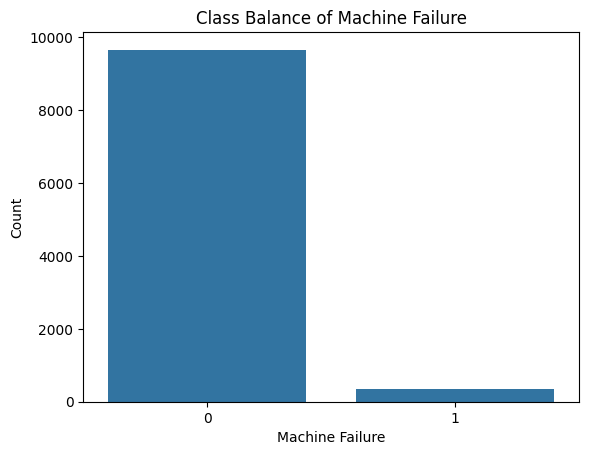

In [8]:
sns.countplot(data=df, x='Machine failure')
plt.title('Class Balance of Machine Failure')
plt.xlabel('Machine Failure')
plt.ylabel('Count')
plt.show()

In [9]:
df['Machine failure'].value_counts()

,count
Machine failure,
0,9661
1,339


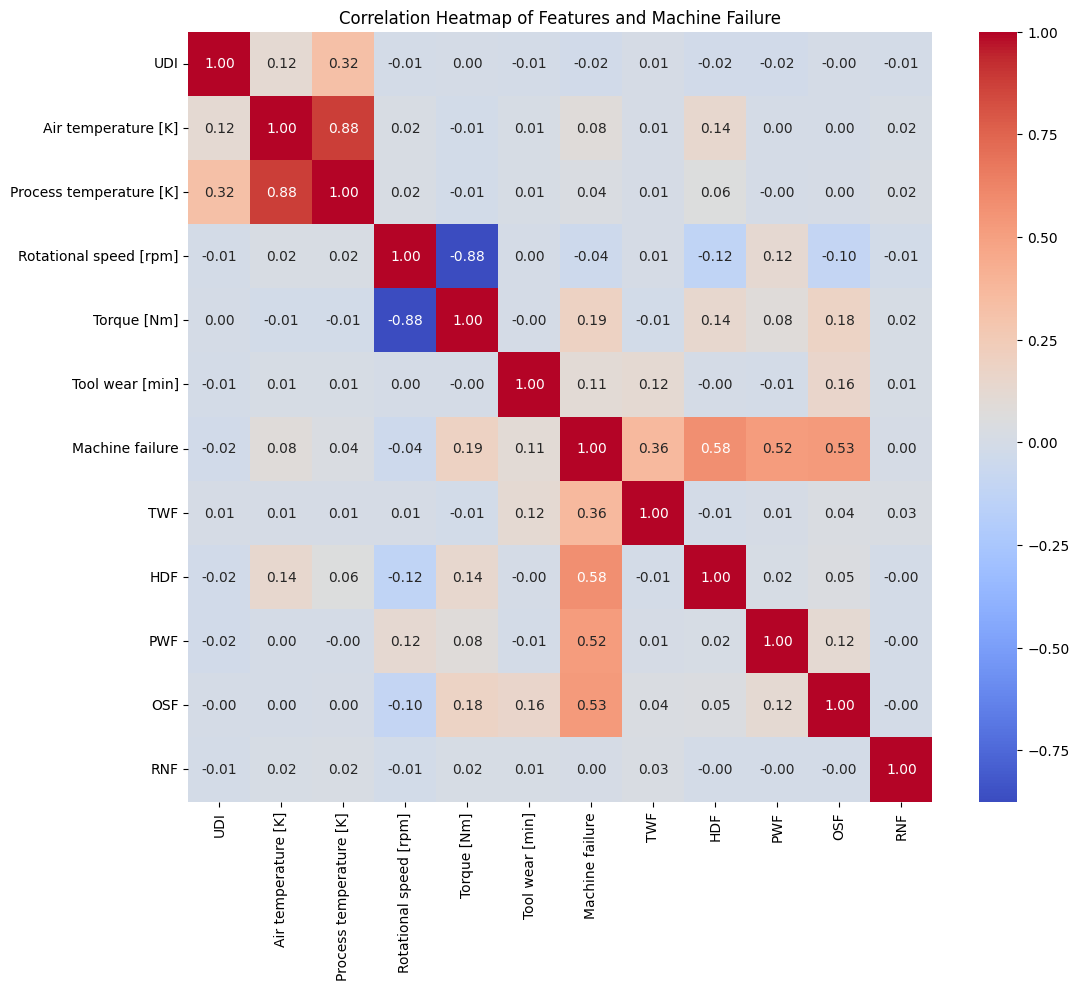

In [10]:
# Drop non-numeric columns before calculating correlation
df_numeric = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Generate a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features and Machine Failure')
plt.show()

In [11]:
df.drop(['UDI', 'Product ID'], axis=1, inplace=True)
df = df.rename(columns={'Air temperature [K]': 'Air_temp', 'Process temperature [K]': 'Process_temp', 'Rotational speed [rpm]': 'Rotat_speed', 'Torque [Nm]': 'Torque', 'Tool wear [min]': 'Tool_wear', 'Machine failure': 'IsFail'})

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Type          10000 non-null  object 
 1   Air_temp      10000 non-null  float64
 2   Process_temp  10000 non-null  float64
 3   Rotat_speed   10000 non-null  int64  
 4   Torque        10000 non-null  float64
 5   Tool_wear     10000 non-null  int64  
 6   IsFail        10000 non-null  int64  
 7   TWF           10000 non-null  int64  
 8   HDF           10000 non-null  int64  
 9   PWF           10000 non-null  int64  
 10  OSF           10000 non-null  int64  
 11  RNF           10000 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 937.6+ KB


In [14]:
df['Rotat_speed'] = df['Rotat_speed'].astype(float)
df['Tool_wear'] = df['Tool_wear'].astype(float)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Type          10000 non-null  object 
 1   Air_temp      10000 non-null  float64
 2   Process_temp  10000 non-null  float64
 3   Rotat_speed   10000 non-null  float64
 4   Torque        10000 non-null  float64
 5   Tool_wear     10000 non-null  float64
 6   IsFail        10000 non-null  int64  
 7   TWF           10000 non-null  int64  
 8   HDF           10000 non-null  int64  
 9   PWF           10000 non-null  int64  
 10  OSF           10000 non-null  int64  
 11  RNF           10000 non-null  int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 937.6+ KB


In [16]:
df['Type'] = df['Type'].map({'L': 0, 'M': 1, 'H': 2})

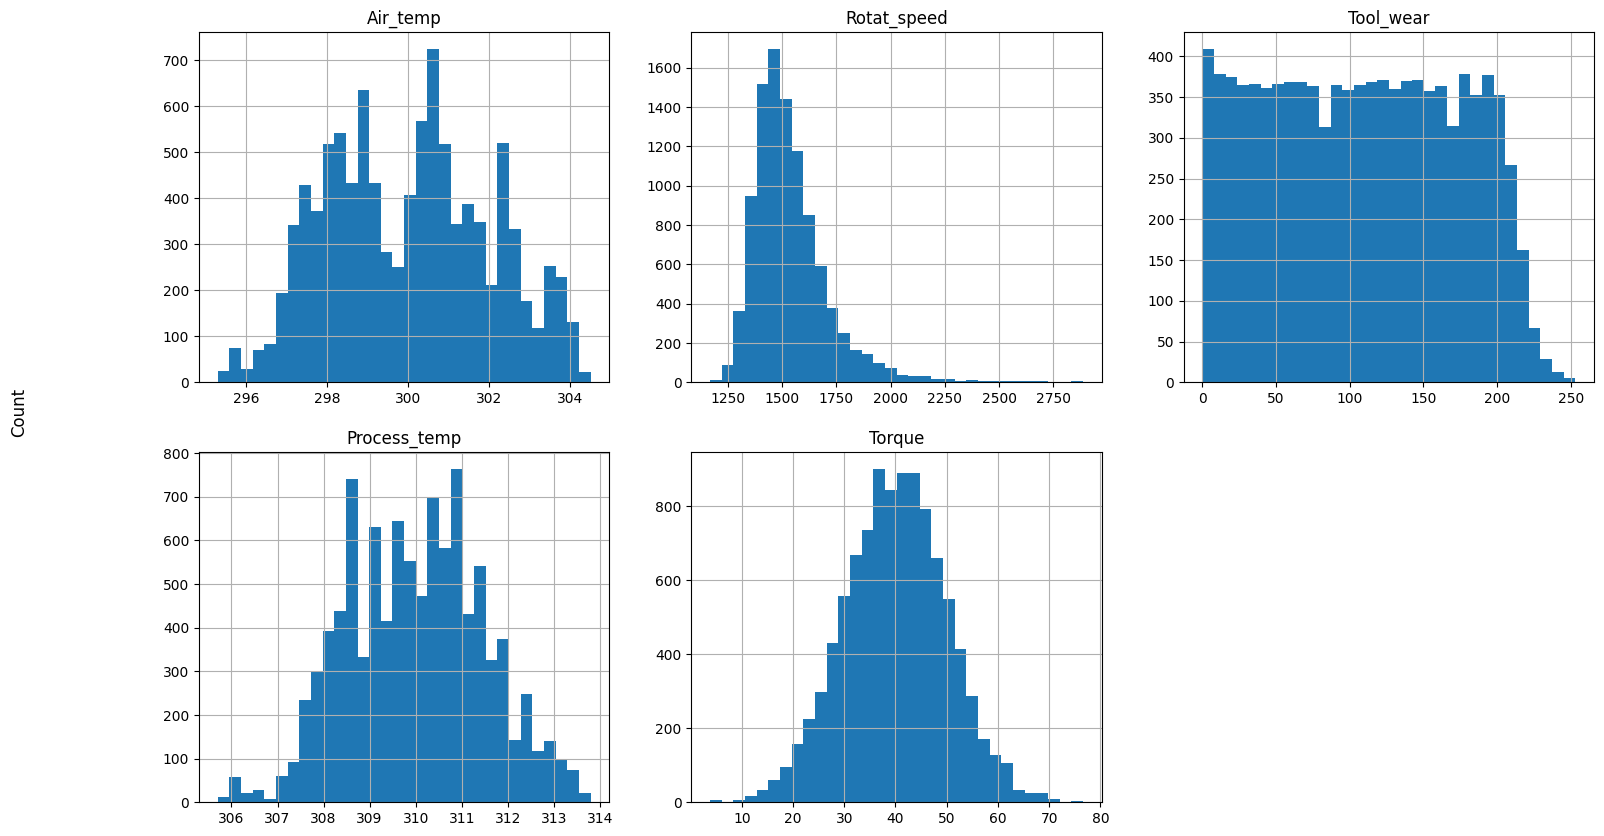

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(18,10))
columns = ['Air_temp', 'Process_temp', 'Rotat_speed', 'Torque', 'Tool_wear']
data=df.copy()
for ind, item in enumerate (columns):
    column = columns[ind]
    df_column = data[column]
    df_column.hist(ax = axes[ind%2][ind//2], bins=32).set_title(item)
fig.supylabel('Count')
fig.subplots_adjust(hspace=0.2)
fig.delaxes(axes[1,2])

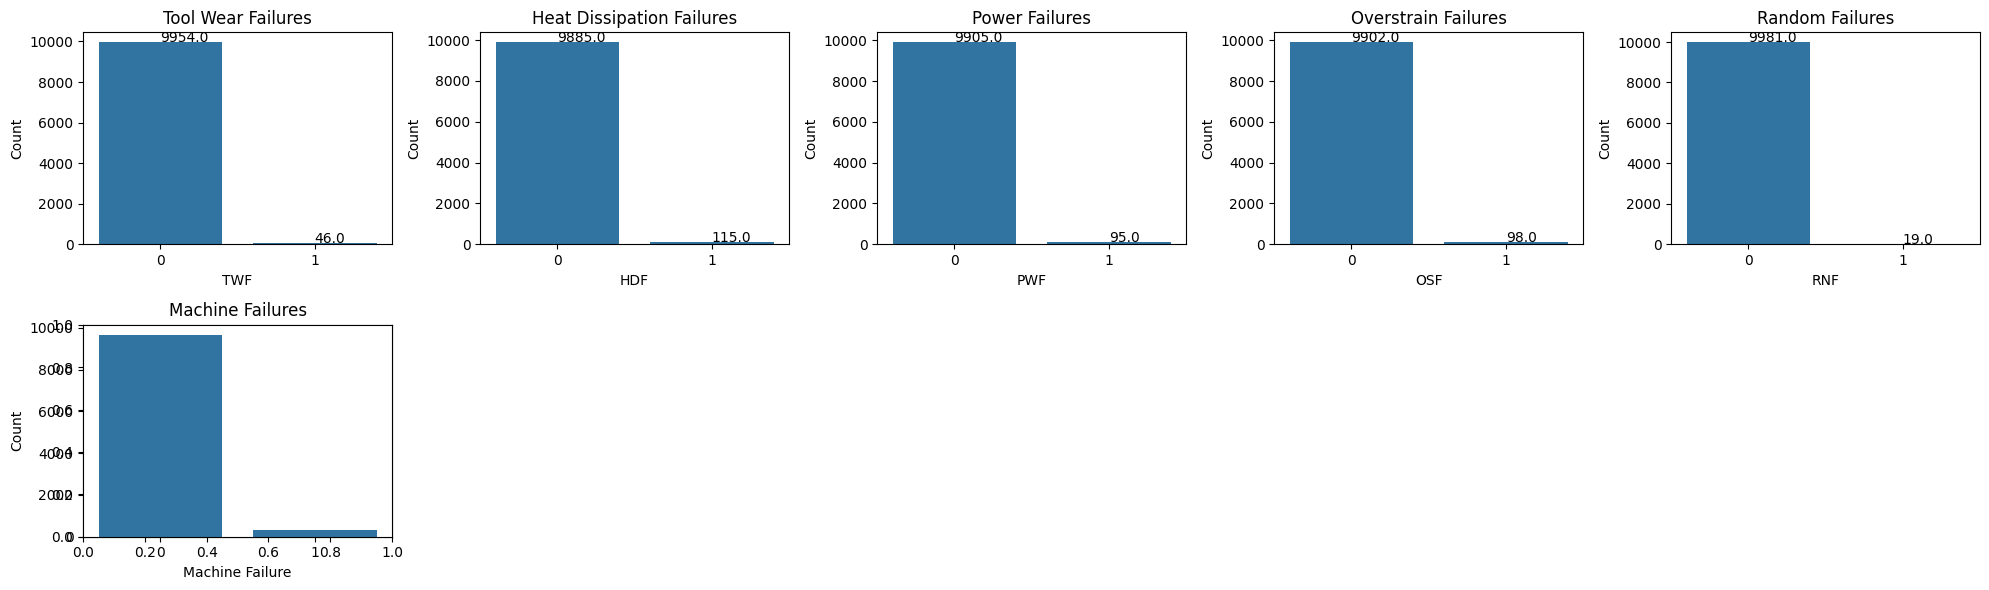

In [27]:
failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
failure_titles = ['Tool Wear Failures', 'Heat Dissipation Failures', 'Power Failures', 'Overstrain Failures', 'Random Failures']

# Create a figure with a grid of subplots
fig, axes = plt.subplots(2, 5, figsize=(20, 6))
axes = axes.flatten() # Flatten the 2x5 grid to a 1D array for easy iteration

# Plot each failure type in a separate subplot
for i, failure_type in enumerate(failure_types):
    sns.countplot(x=failure_type, data=df, ax=axes[i])
    # axes[i].set_title(f'Count of {failure_type}')
    axes[i].set_xlabel(failure_type)
    axes[i].set_ylabel('Count')
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height()}', (p.get_x()+0.4, p.get_height()+5))

for i, failure_title in enumerate(failure_titles):
    axes[i].set_title(f'{failure_title}')

# Remove the unused subplots in the first row
# for j in range(len(failure_types), 5):
#     fig.delaxes(axes[j])

# Plot the counts for no failure versus the sum of all failure types in the second row, spanning only one column
ax_isfail = fig.add_subplot(2, 5, 6) # Position in the second row, first column
sns.countplot(x='IsFail', data=df, ax=ax_isfail)
ax_isfail.set_title('Machine Failures')
ax_isfail.set_xlabel('Machine Failure')
ax_isfail.set_ylabel('Count')
for p in ax_isfail.patches:
    ax_isfail.annotate(f'{p.get_height()}', (p.get_x()+0.4, p.get_height()+50))

# Remove the unused subplots in the second row
for k in range(6, 10):
    fig.delaxes(axes[k])

plt.tight_layout() # Adjust layout to prevent overlapping titles and labels
plt.show()

In [28]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Type,10000.0,0.50030,0.671301,0.0,0.0,0.0,1.0,2.0
Air_temp,10000.0,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
Process_temp,10000.0,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
Rotat_speed,10000.0,1538.77610,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque,10000.0,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
Tool_wear,10000.0,107.95100,63.654147,0.0,53.0,108.0,162.0,253.0
IsFail,10000.0,0.03390,0.180981,0.0,0.0,0.0,0.0,1.0
TWF,10000.0,0.00460,0.067671,0.0,0.0,0.0,0.0,1.0
HDF,10000.0,0.01150,0.106625,0.0,0.0,0.0,0.0,1.0
PWF,10000.0,0.00950,0.097009,0.0,0.0,0.0,0.0,1.0


In [29]:
# Separate features and target
features = df[['Type', 'Air_temp', 'Process_temp', 'Rotat_speed', 'Torque', 'Tool_wear']]
labels = df['IsFail']

# Split the dataset into the training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [30]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

Accuracy: 0.9765
Precision: 0.8182
Recall: 0.2951
F1 Score: 0.4337


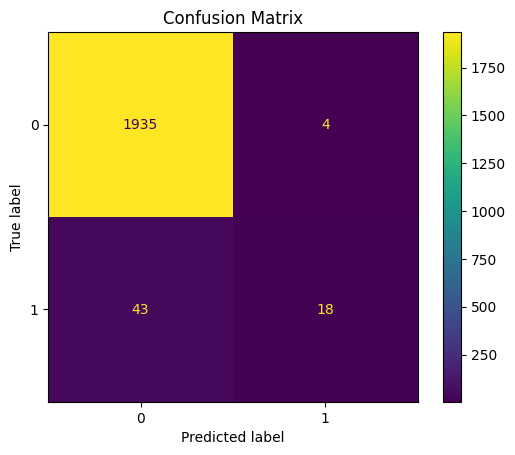

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot()
plt.title('Confusion Matrix')
plt.show()

## Train logistic regression model



In [31]:
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression model
log_reg_model = LogisticRegression(random_state=42)

# Fit the model to the training data
log_reg_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

## Evaluate logistic regression model

### Subtask:
Make predictions on the test data using the trained Logistic Regression model and evaluate its performance using relevant metrics (accuracy, precision, recall, F1-score, and confusion matrix).


**Reasoning**:
Make predictions using the trained Logistic Regression model and evaluate its performance using various metrics.



Logistic Regression Accuracy: 0.9740
Logistic Regression Precision: 0.6667
Logistic Regression Recall: 0.2951
Logistic Regression F1 Score: 0.4091


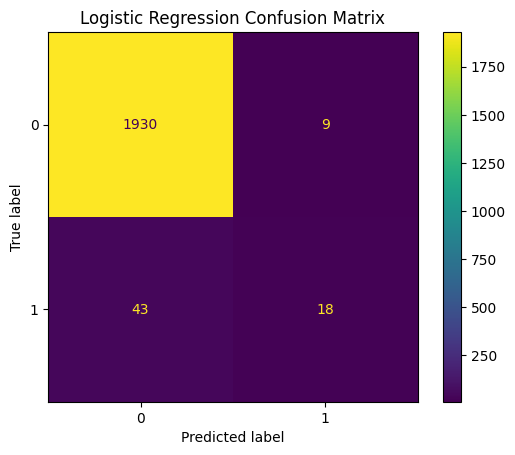

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Make predictions on the test set
y_pred_lr = log_reg_model.predict(X_test)

# Calculate evaluation metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Print the evaluation metrics
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print(f"Logistic Regression Precision: {precision_lr:.4f}")
print(f"Logistic Regression Recall: {recall_lr:.4f}")
print(f"Logistic Regression F1 Score: {f1_lr:.4f}")

# Display the confusion matrix
disp_lr = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lr, display_labels=[0, 1])
disp_lr.plot()
plt.title('Logistic Regression Confusion Matrix')
plt.show()

## Train XGBoost Classifier Model


In [34]:
from xgboost import XGBClassifier

# Instantiate an XGBClassifier object
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit the XGBoost classifier model to the training data
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

## Evaluate XGBoost Classifier Model


XGBoost Accuracy: 0.9860
XGBoost Precision: 0.8511
XGBoost Recall: 0.6557
XGBoost F1 Score: 0.7407


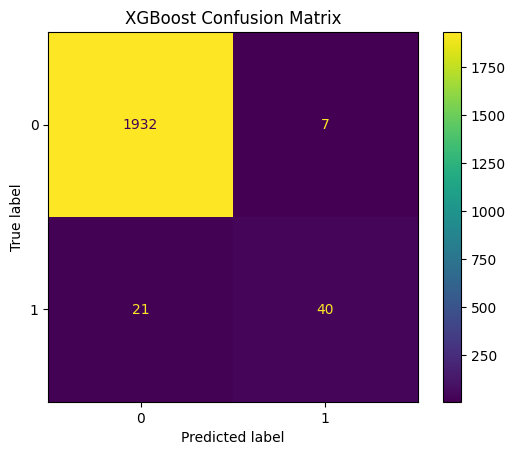

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Calculate evaluation metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Print the evaluation metrics
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")
print(f"XGBoost Precision: {precision_xgb:.4f}")
print(f"XGBoost Recall: {recall_xgb:.4f}")
print(f"XGBoost F1 Score: {f1_xgb:.4f}")

# Display the confusion matrix
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_xgb, display_labels=[0, 1])
disp_xgb.plot()
plt.title('XGBoost Confusion Matrix')
plt.show()

## Compare model performances


In [36]:
print("Model Performance Comparison:")
print("-" * 30)
print(f"Random Forest:")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1 Score: {f1:.4f}")
print("-" * 30)
print(f"Logistic Regression:")
print(f"  Accuracy: {accuracy_lr:.4f}")
print(f"  Precision: {precision_lr:.4f}")
print(f"  Recall: {recall_lr:.4f}")
print(f"  F1 Score: {f1_lr:.4f}")
print("-" * 30)
print(f"XGBoost:")
print(f"  Accuracy: {accuracy_xgb:.4f}")
print(f"  Precision: {precision_xgb:.4f}")
print(f"  Recall: {recall_xgb:.4f}")
print(f"  F1 Score: {f1_xgb:.4f}")

# Discussion of strengths and weaknesses based on metrics and class imbalance

print("\nDiscussion:")
print("Considering the significant class imbalance (many more non-failures than failures), accuracy alone is not a sufficient metric.")
print("Precision measures the proportion of correctly identified positive predictions out of all positive predictions.")
print("Recall measures the proportion of correctly identified positive predictions out of all actual positive cases.")
print("The F1-score is the harmonic mean of precision and recall, providing a balanced measure.")
print("\nBased on the metrics:")
print("- Random Forest has high precision but low recall and moderate F1-score.")
print("- Logistic Regression has moderate precision and low recall and moderate F1-score.")
print("- XGBoost has the best balance of precision and recall, resulting in the highest F1-score, making it the best performing model for identifying machine failures in this imbalanced dataset.")

Model Performance Comparison:
------------------------------
Random Forest:
  Accuracy: 0.9765
  Precision: 0.8182
  Recall: 0.2951
  F1 Score: 0.4337
------------------------------
Logistic Regression:
  Accuracy: 0.9740
  Precision: 0.6667
  Recall: 0.2951
  F1 Score: 0.4091
------------------------------
XGBoost:
  Accuracy: 0.9860
  Precision: 0.8511
  Recall: 0.6557
  F1 Score: 0.7407

Discussion:
Considering the significant class imbalance (many more non-failures than failures), accuracy alone is not a sufficient metric.
Precision measures the proportion of correctly identified positive predictions out of all positive predictions.
Recall measures the proportion of correctly identified positive predictions out of all actual positive cases.
The F1-score is the harmonic mean of precision and recall, providing a balanced measure.

Based on the metrics:
- Random Forest has high precision but low recall and moderate F1-score.
- Logistic Regression has moderate precision and low recall 

## Summary:

### Data Analysis Key Findings

*   The Logistic Regression model achieved an accuracy of 0.9740, a precision of 0.6667, a recall of 0.2951, and an F1-score of 0.4091 on the test data.
*   The XGBoost model achieved an accuracy of 0.9860, a precision of 0.8511, a recall of 0.6557, and an F1-score of 0.7407 on the test data.
*   Comparing the models, XGBoost demonstrated the best balance of precision (0.8511) and recall (0.6557), resulting in the highest F1-score (0.7407), making it the best performing model for identifying machine failures in this imbalanced dataset.
*   Random Forest had high precision but low recall and moderate F1-score.
*   Logistic Regression had moderate precision and low recall and moderate F1-score.

### Insights or Next Steps

*   Given the class imbalance, the F1-score is a more reliable metric than accuracy for evaluating model performance in identifying machine failures.
*   Further optimization of the XGBoost model's hyperparameters could potentially improve its performance even further.


## Visualize feature distributions by machine failure

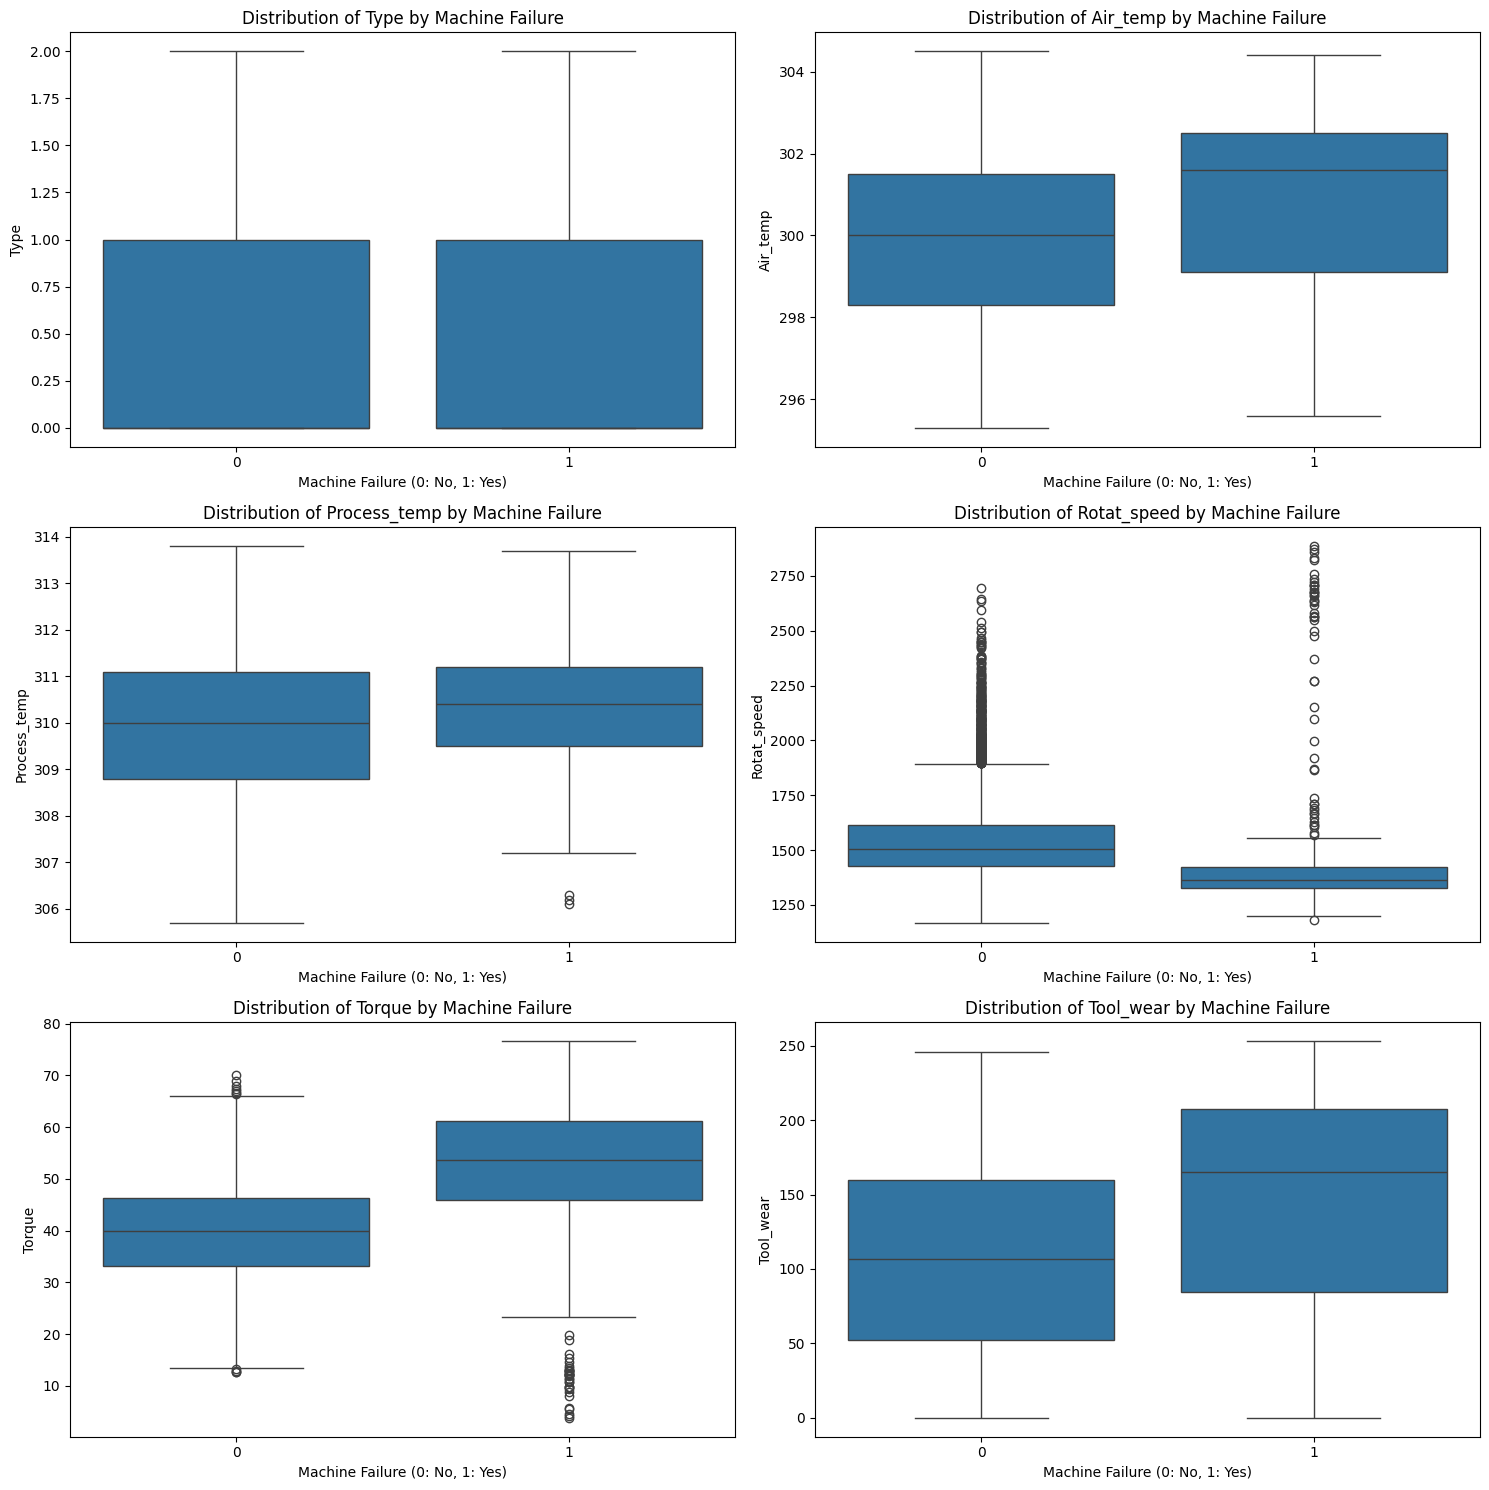

In [ ]:
# Select numerical columns to plot
numerical_features = ['Type', 'Air_temp', 'Process_temp', 'Rotat_speed', 'Torque', 'Tool_wear']

# Create boxplots for each numerical feature, colored by 'IsFail'
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.boxplot(x='IsFail', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} by Machine Failure')
    axes[i].set_xlabel('Machine Failure (0: No, 1: Yes)')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

## Visualize Predicted Probabilities vs. True Labels (XGBoost)

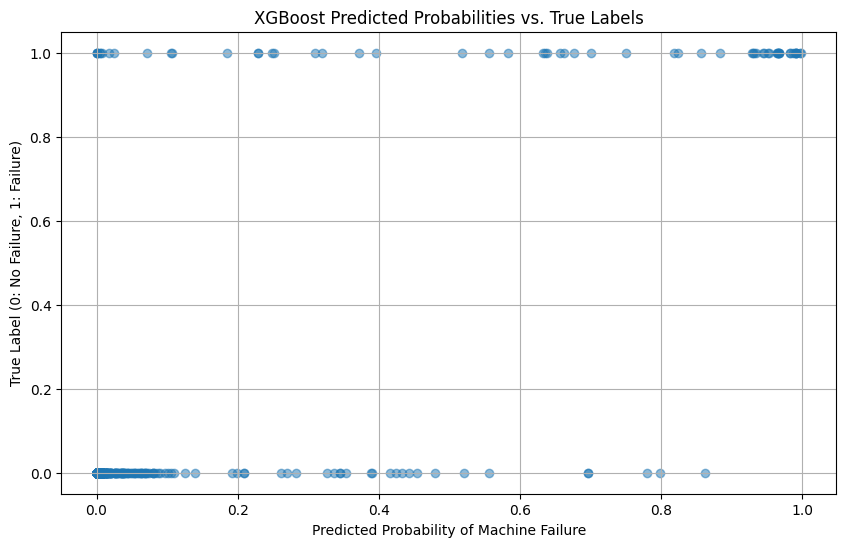

In [ ]:
# Get predicted probabilities for the positive class (Machine Failure = 1)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Create a scatter plot of predicted probabilities vs. true labels
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_proba_xgb, y_test, alpha=0.5)
plt.xlabel('Predicted Probability of Machine Failure')
plt.ylabel('True Label (0: No Failure, 1: Failure)')
plt.title('XGBoost Predicted Probabilities vs. True Labels')
plt.grid(True)
plt.show()

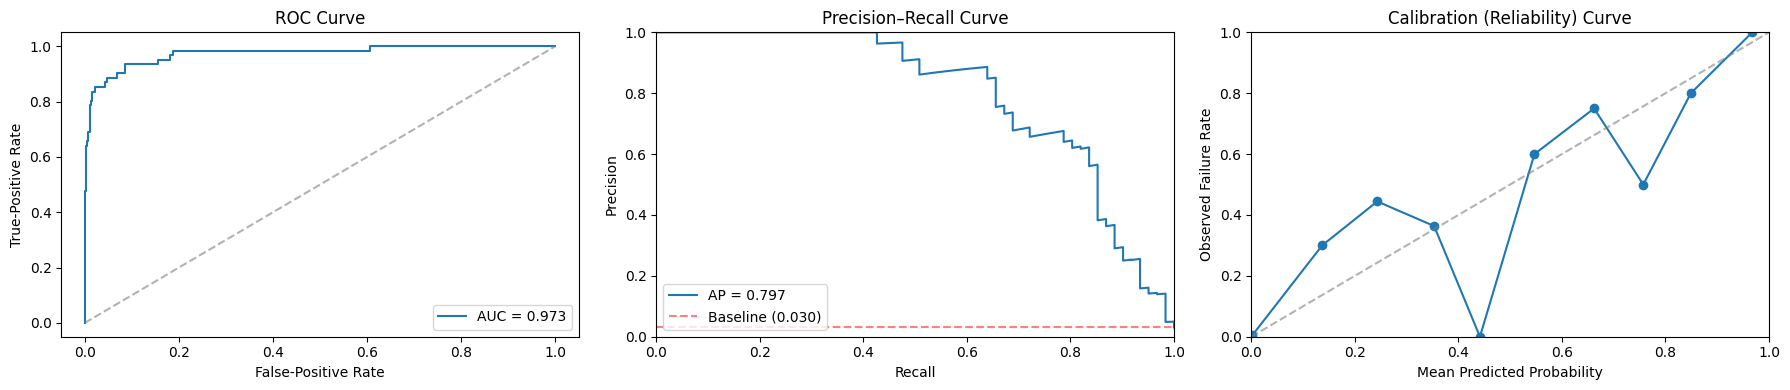

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    roc_curve, auc,
    precision_recall_curve, average_precision_score
)
from sklearn.calibration import calibration_curve

# --- true labels & predicted probabilities ------------------
# y_test: 1-D array (shape: (n_samples,))
y_test = np.asarray(y_test).ravel()

# y_pred_proba: positive-class probability (shape: (n_samples,))
try:
    y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]
except AttributeError:
    # e.g. if using a CalibratedClassifierCV wrapper
    y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# --- figure setup ------------------------------------------
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
axes[0].plot(fpr, tpr, label=f"AUC = {roc_auc:0.3f}")
axes[0].plot([0, 1], [0, 1], "--", color="gray", alpha=0.6)
axes[0].set_title("ROC Curve")
axes[0].set_xlabel("False-Positive Rate")
axes[0].set_ylabel("True-Positive Rate")
axes[0].legend(loc="lower right")

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
ap = average_precision_score(y_test, y_pred_proba)
axes[1].plot(recall, precision, label=f"AP = {ap:0.3f}")
# baseline: positives / total
baseline = y_test.mean()
axes[1].hlines(baseline, 0, 1, colors="red", linestyles="--",
               alpha=0.5, label=f"Baseline ({baseline:0.3f})")
axes[1].set_title("Precision–Recall Curve")
axes[1].set_xlabel("Recall")
axes[1].set_ylabel("Precision")
axes[1].set_xlim([0, 1]); axes[1].set_ylim([0, 1])
axes[1].legend(loc="lower left")

# Calibration curve
prob_true, prob_pred = calibration_curve(
    y_test, y_pred_proba, n_bins=10, strategy="uniform"
)
axes[2].plot(prob_pred, prob_true, marker="o")
axes[2].plot([0, 1], [0, 1], "--", color="gray", alpha=0.6)
axes[2].set_title("Calibration (Reliability) Curve")
axes[2].set_xlabel("Mean Predicted Probability")
axes[2].set_ylabel("Observed Failure Rate")
axes[2].set_xlim([0, 1]); axes[2].set_ylim([0, 1])

plt.tight_layout()
plt.show()
